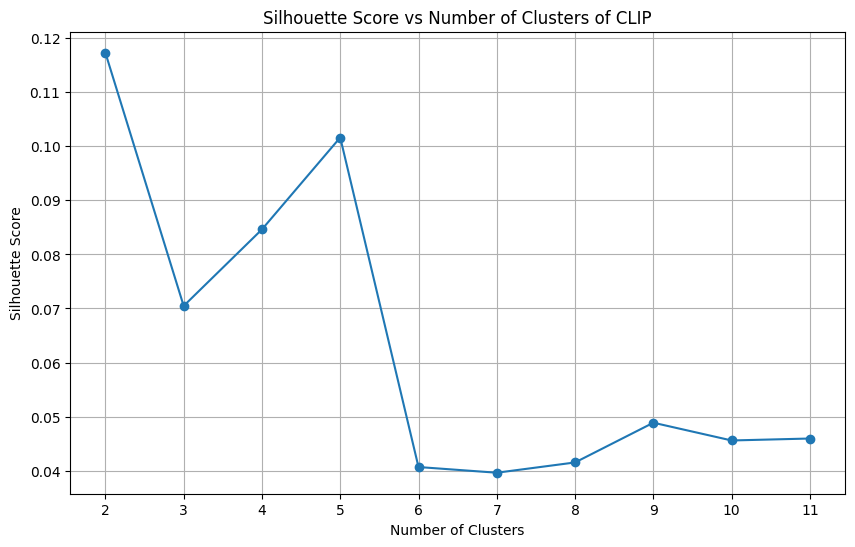

In [9]:
from sklearn.preprocessing import StandardScaler as ss
from sklearn.metrics import silhouette_score
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv(r'D:\CODING\Project\NVIDIA Stock prediction\data\embedding_text\CLIP_EmbeddingText.csv')
data = df.drop('timestamp', axis=1)
data = pd.DataFrame(ss().fit_transform(data))

silhouette_scores = []

for cluster in range(11, 1, -1):
    model = KMeans(n_clusters=cluster, random_state=42)
    model.fit(data)
    silhouette_avg = silhouette_score(data, model.labels_)
    silhouette_scores.append(silhouette_avg)
    new_data = pd.DataFrame()
    new_data['Cluster'] = model.labels_
    new_data['timestamp'] = df['timestamp']
    new_data.to_csv(r'D:\CODING\Project\NVIDIA Stock prediction\data\classification\CLIP_EmbeddingText_classification.csv', index=False)

plt.figure(figsize=(10, 6))
plt.plot(range(11, 1, -1), silhouette_scores, marker='o')
plt.title('Silhouette Score vs Number of Clusters of CLIP')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range(11, 1, -1))
plt.grid()
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler as ss
from sklearn.metrics import silhouette_score
import pandas as pd
from sklearn.cluster import MeanShift
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv(r'D:\CODING\Project\NVIDIA Stock prediction\data\embedding_text\TF-IDF_EmbeddingText.csv')
data = df.drop('timestamp', axis=1)
data = pd.DataFrame(ss().fit_transform(data))

silhouette_scores = []

model = MeanShift()
model.fit(data)
silhouette_avg = silhouette_score(data, model.labels_)
silhouette_scores.append(silhouette_avg)

new_data = pd.DataFrame()
new_data['Cluster'] = model.labels_
new_data['timestamp'] = df['timestamp']
new_data.to_csv(r'D:\CODING\Project\NVIDIA Stock prediction\data\classification\TF-IDF_EmbeddingText_classification.csv')
